In [1]:
import shapely.geometry
point1 = shapely.geometry.Point(24.952242, 60.1696017)
point2 = shapely.geometry.Point(24.976567, 60.1612500)

In [2]:
polygon = shapely.geometry.Polygon(
    [
        (24.950899, 60.169158),
        (24.953492, 60.169158),
        (24.953510, 60.170104),
        (24.950958, 60.169990)
    ]
)

In [3]:
point1.within(polygon)

True

In [4]:
point2.within(polygon)

False

In [5]:
polygon.contains(point1)

True

In [6]:
polygon.contains(point2)

False

The two ways of checking the spatial relationship are complementary and yield equivalent results; contains() is inverse to within(), and vice versa.

Then, which one should you use? Well, it depends:

if you have many points and just one polygon and you try to find out which one of them is inside the polygon: You might need to iterate over the points and check one at a time if it is within() the polygon.

if you have many polygons and just one point and you want to find out which polygon contains the point: You might need to iterate over the polygons until you find a polygon that contains() the point specified

In [9]:
import pathlib
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "static" / "data"

In [10]:
import geopandas

city_districts = geopandas.read_file(
    DATA_DIRECTORY / "helsinki_city_districts" / "helsinki_city_districts_2021.gpkg"
)
city_districts.head()

,name,geometry
0,Eteläinen,"POLYGON ((24.78280 60.09996, 24.80437 60.07607..."
1,Läntinen,"POLYGON ((24.83140 60.25406, 24.83168 60.25321..."
2,Keskinen,"POLYGON ((24.93345 60.18317, 24.93502 60.18005..."
3,Pohjoinen,"POLYGON ((24.90081 60.23526, 24.89944 60.23500..."
4,Koillinen,"POLYGON ((24.97163 60.24253, 24.97163 60.24246..."


<AxesSubplot: >

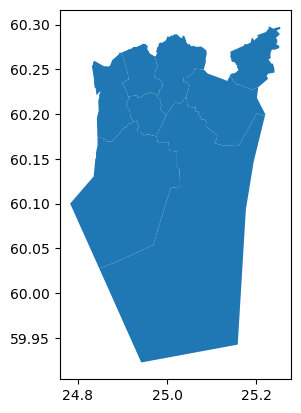

In [11]:
city_districts.plot()

In [12]:
southern_district = city_districts[city_districts.name == "Eteläinen"]
southern_district

,name,geometry
0,Eteläinen,"POLYGON ((24.78280 60.09996, 24.80437 60.07607..."


In [13]:
addresses = geopandas.read_file(DATA_DIRECTORY / "addresses.gpkg")

<AxesSubplot: >

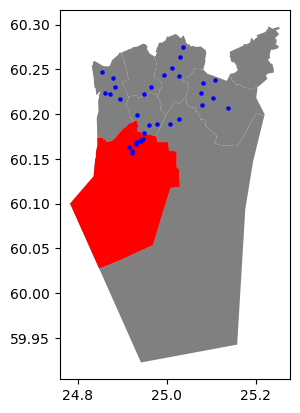

In [14]:
axes = city_districts.plot(facecolor="grey")
southern_district.plot(ax=axes, facecolor="red")
addresses.plot(ax=axes, color="blue", markersize=5)

In the example below, we use southern.at[0, "geometry"] to obtain a single value, a shapely.geometry.Polygon, instead of an entire column (a GeoSeries). This is in order to match each row’s geometry of the entire addresses data frame against the same polygon. If, in contrast, we would run within() against a column, the operation would be carried out row-wise, i.e. the first address point would be checked against the first polygon, the second address point against the second polygon, and so forth.

In [15]:
addresses.within(southern_district.at[0, "geometry"])

0      True
1      True
2      True
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30     True
31     True
32     True
33     True
dtype: bool

In [16]:
addresses_in_the_southern_district = addresses[
    addresses.within(southern_district.at[0, "geometry"])
]
addresses_in_the_southern_district

,address,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",POINT (24.93166 60.16905)
2,"Kauppakeskus Citycenter, 8, Kaivokatu, Keskust...",POINT (24.94179 60.16989)
4,"9, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E...",POINT (24.92169 60.15667)
10,"Rautatientori, Keskusta, Kluuvi, Eteläinen suu...",POINT (24.94269 60.17118)
30,"Kampin keskus, 1, Urho Kekkosen katu, Kamppi, ...",POINT (24.93307 60.16908)
31,"Ruoholahdenkatu, Kamppi, Eteläinen suurpiiri, ...",POINT (24.93039 60.16641)
32,"3, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E...",POINT (24.92121 60.15878)
33,"4, Vilhonkatu, Kaisaniemi, Kluuvi, Eteläinen s...",POINT (24.94694 60.17198)


<AxesSubplot: >

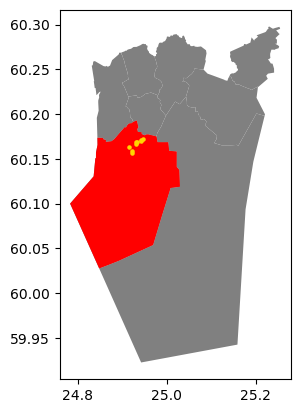

In [17]:
axes = city_districts.plot(facecolor="grey")
southern_district.plot(ax=axes, facecolor="red")

addresses_in_the_southern_district.plot(
    ax=axes,
    color="gold",
    markersize=5
)

In [18]:
line1 = shapely.geometry.LineString([(0, 0), (1, 1)])
line2 = shapely.geometry.LineString([(1, 1), (0, 2)])

In [19]:
line1.intersects(line2)

True

In [23]:
line1.intersects(line1)

True

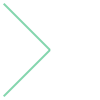

In [20]:
shapely.geometry.MultiLineString([line1, line2])

In [21]:
line1.touches(line1)

False

In [22]:
line1.touches(line2)

True